# <u>Advance House Price Prediction Model</u>
**<u>Data Source -<u>** https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data<br>

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import rcParams
from prettytable import PrettyTable

%matplotlib inline
rcParams["figure.figsize"] = 6,6
pd.pandas.set_option("display.max_columns", None)

## Loading Datasets
In this project there were mainly three CSV files [train.csv, test.csv, sample_submission.csv]. I did this project in several phases. First ....

In [3]:
X_train = pd.read_csv("Final_X_train.csv")
print("Rows :- {} & Columns :- {}".format(X_train.shape[0], X_train.shape[1]))
X_train.head()

Rows :- 1460 & Columns :- 21


,MSSubClass,MSZoning,Neighborhood,OverallQual,YearRemodAdd,RoofStyle,BsmtQual,BsmtExposure,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,PavedDrive,SaleCondition
0,0.235294,0.75,0.636364,0.666667,0.098361,0.0,0.75,0.25,1.00,1.0,0.356155,0.577712,0.333333,0.666667,0.000000,0.2,0.8,0.666667,0.50,1.0,0.75
1,0.000000,0.75,0.500000,0.555556,0.524590,0.0,0.75,1.00,1.00,1.0,0.503056,0.470245,0.000000,0.333333,0.333333,0.6,0.8,0.666667,0.50,1.0,0.75
2,0.235294,0.75,0.636364,0.666667,0.114754,0.0,0.75,0.50,1.00,1.0,0.383441,0.593095,0.333333,0.666667,0.333333,0.6,0.8,0.666667,0.50,1.0,0.75
3,0.294118,0.75,0.727273,0.666667,0.606557,0.0,0.50,0.25,0.75,1.0,0.399941,0.579157,0.333333,0.666667,0.333333,0.8,0.4,0.333333,0.75,1.0,0.00
4,0.235294,0.75,1.000000,0.777778,0.147541,0.0,0.75,0.75,1.00,1.0,0.466237,0.666523,0.333333,0.666667,0.333333,0.6,0.8,0.666667,0.75,1.0,0.75


In [4]:
y_train = pd.read_csv("Final_y_train.csv")
print("Rows :- {}".format(y_train.shape[0]))
y_train.head()

Rows :- 1460


,SalePrice
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216


In [5]:
X_test = pd.read_csv("Final_X_test.csv")
print("Rows :- {} & Columns :- {}".format(X_test.shape[0], X_test.shape[1]))
X_test.head()

Rows :- 1459 & Columns :- 21


,MSSubClass,MSZoning,Neighborhood,OverallQual,YearRemodAdd,RoofStyle,BsmtQual,BsmtExposure,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,PavedDrive,SaleCondition
0,0.000000,0.75,0.40,0.444444,0.822581,0.0,0.50,0.25,0.25,1.0,0.312253,0.312253,0.0,0.75,0.00,0.2,0.666667,0.333333,0.2,1.0,0.0
1,0.000000,1.00,0.40,0.555556,0.870968,1.0,0.50,0.25,0.25,1.0,0.468253,0.468253,0.0,0.50,0.00,0.2,0.666667,0.333333,0.2,1.0,0.0
2,0.235294,1.00,0.90,0.444444,0.225806,0.0,0.25,0.25,0.00,1.0,0.326139,0.548792,0.0,0.75,0.25,0.8,0.666667,1.000000,0.4,1.0,0.0
3,0.235294,1.00,0.90,0.555556,0.225806,0.0,0.50,0.25,0.50,1.0,0.325285,0.542672,0.0,0.50,0.25,0.6,0.666667,1.000000,0.4,1.0,0.0
4,0.588235,1.00,0.45,0.777778,0.322581,0.0,0.25,0.25,0.50,1.0,0.453388,0.453388,0.0,0.50,0.00,0.2,0.666667,0.666667,0.4,1.0,0.0


In [6]:
y_test = pd.read_csv("Final_y_test.csv")
print("Rows :- {}".format(y_test.shape[0]))
y_test.head()

Rows :- 1459


,SalePrice
0,12.039292
1,12.142911
2,12.120426
3,12.096913
4,11.923246


## Model Building

In [7]:
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, VotingRegressor
from sklearn.model_selection import GridSearchCV
import xgboost
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

> To check whether a model is Overfitting or not I will be predicting output from train data on each algorithm with its default params.

In [8]:
# R2 & Adj. R2 formullas :-
#     r2 = r2_score(y_test, y_pred)
#     n = len(X_test)
#     r2_adj = 1 - (1 - r2) * (n - 1) / (n - (k - 1))  # k means the number of features

def train_predict_accuracy(estimator, X_train, y_train, X_test, y_test, want_fit = "No"):
    if want_fit == "Yes":
        clf = estimator.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        rmse = math.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)

        print("RMSE :-", rmse)
        print("MAE :-", mae)
        return rmse, mae, clf

    if want_fit == "No":
        estimator.fit(X_train, y_train)
        y_pred = estimator.predict(X_test)

        rmse = math.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)

        print("RMSE :-", rmse)
        print("MAE :-", mae)
        return rmse, mae

In [9]:
def best_param_val(dict, metric, param_name = "Params"):
    min_value = min(dict.items(), key=lambda x: x[0])
    print("Best " + param_name +  " having minimum " + metric + " {} is : {}".format(min_value[0], min_value[1]))
    dict.clear()
    return min_value

In [10]:
def timer(start_time=None):
    from datetime import datetime
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

### Linear Regression

***Predictions on Training Data***

In [10]:
lr = LinearRegression()
rmse_lr, mae_lr = train_predict_accuracy(lr, X_train, y_train, X_train, y_train)

RMSE :- 0.13438364411794562
MAE :- 0.09493599874584878


***Predictions on Testing Data***

In [11]:
lr = LinearRegression()
rmse_lr, mae_lr = train_predict_accuracy(lr, X_train, y_train, X_test, y_test)

RMSE :- 0.3746130793250347
MAE :- 0.3079999901815408


It can be seen that the model is easily Overfitting

### Lasso Regression

***Predictions on Training Data***

In [12]:
lasso = Lasso()
rmse_lasso, mae_lasso = train_predict_accuracy(lasso, X_train, y_train, X_train, y_train)

RMSE :- 0.39931504624370256
MAE :- 0.3098117038974676


***Predictions on Testing Data***

In [13]:
lasso = Lasso()
rmse_lasso, mae_lasso = train_predict_accuracy(lasso, X_train, y_train, X_test, y_test)

RMSE :- 0.11282671270523145
MAE :- 0.09109931787026766


***Tuning Lasso Regression***

In [14]:
rmse_dict = {}
mae_dict = {}
alpha = [1.0, 0.5, 0.05, 0.005, 0.0005]
for i in alpha:
    lasso = Lasso(alpha=i)
    print("At Alpha :-", i)
    rmse, mae = train_predict_accuracy(lasso, X_train, y_train, X_test, y_test)
    print()
    rmse_dict.update({rmse : i})
    mae_dict.update({mae : i})

rmse_lasso, rmse_lasso_param = best_param_val(rmse_dict, "RMSE", "Alpha")
mae_lasso, mae_lasso_param = best_param_val(mae_dict, "MAE", "Alpha")

At Alpha :- 1.0
RMSE :- 0.11282671270523145
MAE :- 0.09109931787026766

At Alpha :- 0.5
RMSE :- 0.11282671270523145
MAE :- 0.09109931787026766

At Alpha :- 0.05
RMSE :- 0.1344996017206192
MAE :- 0.10793005818959789

At Alpha :- 0.005
RMSE :- 0.2857683586807933
MAE :- 0.2355463803661212

At Alpha :- 0.0005
RMSE :- 0.3649365313227914
MAE :- 0.2996250568398266

Best Alpha having minimum RMSE 0.11282671270523145 is : 0.5
Best Alpha having minimum MAE 0.09109931787026766 is : 0.5


### Ridge Regression

***Predictions on Training Data***

In [15]:
ridge = Ridge()
rmse_ridge, mae_ridge = train_predict_accuracy(ridge, X_train, y_train, X_train, y_train)

RMSE :- 0.13462694878722886
MAE :- 0.09514558219652842


***Predictions on Testing Data***

In [16]:
ridge = Ridge()
rmse_ridge, mae_ridge = train_predict_accuracy(ridge, X_train, y_train, X_test, y_test)

RMSE :- 0.37066466832487743
MAE :- 0.3052896971113192


***Tuning Ridge Regression***

In [17]:
rmse_dict = {}
mae_dict = {}
alpha = [1.0, 0.5, 0.05, 0.005, 0.0005]
for i in alpha:
    ridge = Ridge(alpha=i)
    print("At Alpha ", i)
    rmse, mae = train_predict_accuracy(ridge, X_train, y_train, X_test, y_test)
    print()
    
    rmse_dict.update({rmse : i})
    mae_dict.update({mae : i})

rmse_ridge, rmse_ridge_param = best_param_val(rmse_dict, "RMSE", "Alpha")
mae_ridge, mae_ridge_param = best_param_val(mae_dict, "MAE", "Alpha")

At Alpha  1.0
RMSE :- 0.37066466832487743
MAE :- 0.3052896971113192

At Alpha  0.5
RMSE :- 0.3725963095287079
MAE :- 0.30663008201594466

At Alpha  0.05
RMSE :- 0.3744074349309213
MAE :- 0.3078604966343594

At Alpha  0.005
RMSE :- 0.3745924744431633
MAE :- 0.30798600299000517

At Alpha  0.0005
RMSE :- 0.37461101843161604
MAE :- 0.3079985915524902

Best Alpha having minimum RMSE 0.37066466832487743 is : 1.0
Best Alpha having minimum MAE 0.3052896971113192 is : 1.0


### Stochastic Gradient Descent

***Predictions on Training Data***

In [18]:
sgd = SGDRegressor()
rmse_sgd, mae_sgd = train_predict_accuracy(sgd, X_train, y_train.values.ravel(), X_train, y_train.values.ravel())

RMSE :- 0.4010762028596968
MAE :- 0.2995074895433472


***Predictions on Testing Data***

In [19]:
sgd = SGDRegressor()
rmse_sgd, mae_sgd = train_predict_accuracy(sgd, X_train, y_train.values.ravel(), X_test, y_test.values.ravel())

RMSE :- 1.1074175501668166
MAE :- 0.9668898448482767


***Tuning SGD Regressor***

In [20]:
rmse_dict = {}
mae_dict = {}
alpha = [1.0, 0.5, 0.05, 0.005, 0.0005]
penalty = ['l2', 'l1', 'elasticnet']
for j in penalty:
    for i in alpha:
        sgd = SGDRegressor(penalty=j, alpha=i)
        print("At Penalty {} & Alpha {}".format(j, i))
        rmse, mae = train_predict_accuracy(sgd, X_train, y_train.values.ravel(), X_test, y_test.values.ravel())
        print()
        
        rmse_dict.update({rmse : [i, j]})
        mae_dict.update({mae : [i, j]})

At Penalty l2 & Alpha 1.0
RMSE :- 0.2452842978098857
MAE :- 0.2180731511857376

At Penalty l2 & Alpha 0.5
RMSE :- 0.36566303317663823
MAE :- 0.32202427076209394

At Penalty l2 & Alpha 0.05
RMSE :- 0.7297188683591663
MAE :- 0.6388278671267964

At Penalty l2 & Alpha 0.005
RMSE :- 1.0291838273820937
MAE :- 0.8984432261044905

At Penalty l2 & Alpha 0.0005
RMSE :- 1.0850061105624293
MAE :- 0.9454400014868861

At Penalty l1 & Alpha 1.0
RMSE :- 0.11376477786899236
MAE :- 0.09196478934251716

At Penalty l1 & Alpha 0.5
RMSE :- 0.11310497445954742
MAE :- 0.09135603584943182

At Penalty l1 & Alpha 0.05
RMSE :- 0.7493727073842732
MAE :- 0.6745639160801097

At Penalty l1 & Alpha 0.005
RMSE :- 1.0280658824881286
MAE :- 0.8995563621680943

At Penalty l1 & Alpha 0.0005
RMSE :- 1.1014307478300118
MAE :- 0.9614576571314518

At Penalty elasticnet & Alpha 1.0
RMSE :- 0.11827318452231729
MAE :- 0.0961737562590767

At Penalty elasticnet & Alpha 0.5
RMSE :- 0.29770706756778553
MAE :- 0.27454834262052336

At 

In [21]:
rmse_sgd, rmse_sgd_param = best_param_val(rmse_dict, "RMSE", "Alpha")
mae_sgd, mae_sgd_param = best_param_val(mae_dict, "MAE", "Alpha")

Best Alpha having minimum RMSE 0.11310497445954742 is : [0.5, 'l1']
Best Alpha having minimum MAE 0.09135603584943182 is : [0.5, 'l1']


### Random Forest

***Predictions on Training Data***

In [22]:
"""RMSE :- 0.05345378900074049, MAE :- 0.03694285201694259"""

# rfr = RandomForestRegressor(criterion="mae")
# train_predict_accuracy(rfr, X_train, y_train.values.ravel(), X_train, y_train.values.ravel())

'RMSE :- 0.05345378900074049, MAE :- 0.03694285201694259'

***Predictions on Testing Data***

In [23]:
"""RMSE :- 0.3516339358649479, MAE :- 0.28761432504105483"""

# rfr = RandomForestRegressor(criterion="mae")
# train_predict_accuracy(rfr, X_train, y_train.values.ravel(), X_test, y_test.values.ravel())

'RMSE :- 0.3516339358649479, MAE :- 0.28761432504105483'

**Hyperparameter Tuning using Grid Search CV :-**

In [24]:
# params = {"n_estimators": [50, 100, 150], "max_depth": [None], "max_features": ["auto"]} -> 
# Selected - {'max_depth': None, 'max_features': 'auto', 'n_estimators': 150}
# Using Cross-Val-Score array([0.89661721, 0.87875229, 0.88123017, 0.89390206, 0.87705776])
# RMSE - 0.34451560966332684, MAE - 0.2838325008760729

# |--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|

# params = {"n_estimators": [150, 200, 250]}
# Selected - n_estimators = 250
# RMSE :- 0.3491806560761994, MAE :- 0.2872283547815526

# |--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|

# params = {"n_estimators": [250, 300, 350, 400, 500]}
# Selected - n_estimators = 500
# RMSE :- 0.34615275329928336, MAE :- 0.2842855851152362

# X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X

# params = {"n_estimators": [250, 300, 350, 400, 500]}
# rfr = RandomForestRegressor(criterion='mae')
# rfr_gscv = GridSearchCV(rfr, param_grid=params)
# rmse, mae, rfr_gscv = train_predict_accuracy(rfr_gscv, X_train, y_train.values.ravel(), X_test, y_test.values.ravel())
# print(rfr_gscv.best_params_)

***Finding best n_estimator for Random Forest***
> As we can see from above commented code that here only n_estimator param is having affect on output. Whereas when I tried many different-different combinations of Params using Grid Search CV only n_estimator was changing nothing else. So, now I am runing a for loop on different-different n_estimator values. Then will select the best one.

In [25]:
mae_list = []
n_estimators_list = [100, 150, 200, 250, 300, 350, 400, 450, 500]
for i in n_estimators_list:
    print("n_estimator -", i)
    rfr = RandomForestRegressor(n_estimators=i, criterion="mae")
    rmse, mae = train_predict_accuracy(rfr, X_train, y_train.values.ravel(), X_test, y_test.values.ravel())
    print()
    
    mae_list.append(mae)

n_estimator - 100
RMSE :- 0.34985226846320977
MAE :- 0.2871055406265186

n_estimator - 200
RMSE :- 0.3465685367059785
MAE :- 0.285583165402356

n_estimator - 300
RMSE :- 0.35031843506336136
MAE :- 0.2886256432829973

n_estimator - 400
RMSE :- 0.34865835895349545
MAE :- 0.28725618690552884

n_estimator - 500
RMSE :- 0.34880125250127286
MAE :- 0.2872856384003092

n_estimator - 600
RMSE :- 0.3478384687934967
MAE :- 0.28652177311331256

n_estimator - 700
RMSE :- 0.34997591938897976
MAE :- 0.2884455509576732

n_estimator - 800
RMSE :- 0.3478326468917928
MAE :- 0.28665941296938374

n_estimator - 900
RMSE :- 0.3484163391050363
MAE :- 0.2867316593011559

n_estimator - 1000
RMSE :- 0.349723443649285
MAE :- 0.28789204345936675



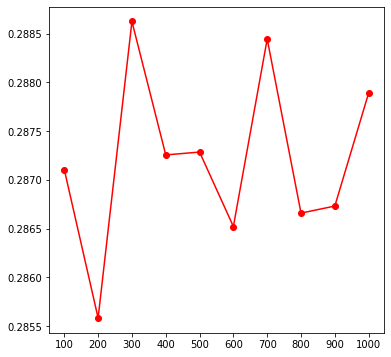

In [26]:
plt.plot(n_estimators_list, mae_list, color="red", marker="o")
plt.xticks(n_estimators_list)
plt.show()

In [43]:
rfr_param = n_estimators_list[mae_list.index(min(mae_list))]
print("At n_estimator :-", rfr_param)
rfr = RandomForestRegressor(n_estimators=rfr_param, criterion="mae")
rmse_rfr, mae_rfr = train_predict_accuracy(rfr, X_train, y_train.values.ravel(), X_test, y_test.values.ravel())

RMSE :- 0.3505235555468513
MAE :- 0.2877933988952408


### XGBoost

***Predictions on Training Data***

In [28]:
"""RMSE :- 0.02338975739066758, MAE :- 0.01702154320126216"""

# xgb = xgboost.XGBRegressor()
# train_predict_accuracy(xgb, X_train, y_train.values.ravel(), X_train, y_train.values.ravel())

'RMSE :- 0.02338975739066758, MAE :- 0.01702154320126216'

***Predictions on Testing Data***

In [29]:
"""RMSE :- 0.3516339358649479, MAE :- 0.28761432504105483"""

# xgb = xgboost.XGBRegressor()
# train_predict_accuracy(xgb, X_train, y_train.values.ravel(), X_test, y_test.values.ravel())

'RMSE :- 0.3516339358649479, MAE :- 0.28761432504105483'

**Hyperparameter Tuning using Grid Search CV :-**

In [30]:
# params={"learning_rate":[0.20, 0.25, 0.30, 0.35, 0.40],"max_depth":[2, 4, 6, 8, 10],"min_child_weight":[ 1, 3, 5],"gamma":[ 0.0, 0.1, 0.2],"colsample_bytree":[0.0, 0.3, 0.7, 1]}
# Selected - {'colsample_bytree': 0.3, 'gamma': 0.0, 'learning_rate': 0.2, 'max_depth': 4, 'min_child_weight': 3}
# RMSE :- 0.3387788698156826, MAE :- 0.2818891847841473

# X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X

# params={
#  "learning_rate"    : [0.20, 0.25, 0.30, 0.35, 0.40],
#  "max_depth"        : [2, 4, 6, 8, 10],
#  "min_child_weight" : [1, 3, 5],
#  "gamma"            : [0.0, 0.1, 0.2],
#  "colsample_bytree" : [0.0, 0.3, 0.7, 1]}  # can be set b/w 0 & 1.
# xgb = xgboost.XGBRegressor()
# xgb_gscv = GridSearchCV(xgb, param_grid=params)
# rmse, mae, xgb_gscv = train_predict_accuracy(xgb_gscv, X_train, y_train.values.ravel(), X_test, y_test.values.ravel(), want_fit="Yes")
# print(xgb_gscv.best_params_)

***Training Model with Best Parameters***

In [44]:
xgb_params = "colsample_bytree=0.3, gamma=0.0, learning_rate=0.2, max_depth=4, min_child_weight=3"
xgb = xgboost.XGBRegressor(colsample_bytree=0.3, gamma=0.0, learning_rate=0.2, max_depth=4, min_child_weight=3)
rmse_xgb, mae_xgb = train_predict_accuracy(xgb, X_train, y_train.values.ravel(), X_test, y_test.values.ravel())

RMSE :- 0.3387788698156826
MAE :- 0.2818891847841473


**X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X**

### Pretty Table

In [48]:
x = PrettyTable()
x.field_names = ["Model", "RMSE", "MAE"]
x.add_row(["Linear Regression", rmse_lr, mae_lr])
x.add_row(["---------------", "---------------", "---------------"])
x.add_row(["Lasso Regression", rmse_lasso, mae_lasso])
x.add_row(["---------------", "---------------", "---------------"])
x.add_row(["Ridge Regression", rmse_ridge, mae_ridge])
x.add_row(["---------------", "---------------", "---------------"])
x.add_row(["Stochastic Gradient Descent", rmse_sgd, mae_sgd])
x.add_row(["---------------", "---------------", "---------------"])
x.add_row(["Random Forest", rmse_rfr, mae_rfr])
x.add_row(["---------------", "---------------", "---------------"])
x.add_row(["XGBoost", rmse_xgb, mae_xgb])
print(x)

+-----------------------------+---------------------+---------------------+
|            Model            |         RMSE        |         MAE         |
+-----------------------------+---------------------+---------------------+
|      Linear Regression      |  0.3746130793250347 |  0.3079999901815408 |
|       ---------------       |   ---------------   |   ---------------   |
|       Lasso Regression      | 0.11282671270523145 | 0.09109931787026766 |
|       ---------------       |   ---------------   |   ---------------   |
|       Ridge Regression      | 0.37066466832487743 |  0.3052896971113192 |
|       ---------------       |   ---------------   |   ---------------   |
| Stochastic Gradient Descent | 0.11310497445954742 | 0.09135603584943182 |
|       ---------------       |   ---------------   |   ---------------   |
|        Random Forest        |  0.3505235555468513 |  0.2877933988952408 |
|       ---------------       |   ---------------   |   ---------------   |
|           